In [2]:
import os
import torch
from pathlib import Path
import mediapy
import matplotlib
from typing import Tuple, Optional, List, Dict, Any, Union
import matplotlib.pyplot as plt


# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)

from pygpudrive.env.config import EnvConfig, RenderConfig, SceneConfig
from pygpudrive.env.env_torch import GPUDriveTorchEnv

In [3]:
DYNAMICS_MODEL = "delta_local" # "delta_local" / "state" / "classic"
DATA_PATH = "data/processed/examples" # Your data path
MAX_NUM_OBJECTS = 128
NUM_ENVS = 3

# Configs
render_config = RenderConfig(draw_obj_idx=True)
scene_config = SceneConfig(path=DATA_PATH, num_scenes=NUM_ENVS)
env_config = EnvConfig(dynamics_model=DYNAMICS_MODEL)

In [4]:
%load_ext autoreload
%autoreload 2

In [36]:
env_config.polyline_reduction_threshold = 0.1
env_config.obs_radius = 50

In [37]:
env = GPUDriveTorchEnv(
    config=env_config,
    scene_config=scene_config,
    max_cont_agents=MAX_NUM_OBJECTS,
    device="cpu",
    render_config=render_config,
    action_type="continuous" # "continuous" or "discrete"
)


--- Ratio unique scenes / number of worlds = 3 / 3 ---



In [38]:
torch.where(env.cont_agent_mask)

(tensor([0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2]),
 tensor([ 7, 15,  0,  1,  3, 11, 34,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
         11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
         29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 48]))

In [39]:
# fig = env.vis.plot_simulator_state(
#     env_indices=[1],
#     zoom_radius=50,
#     center_agent_indices=[11],
# );

In [40]:
#fig[0].savefig("world_state_0.pdf", format="pdf", bbox_inches="tight")

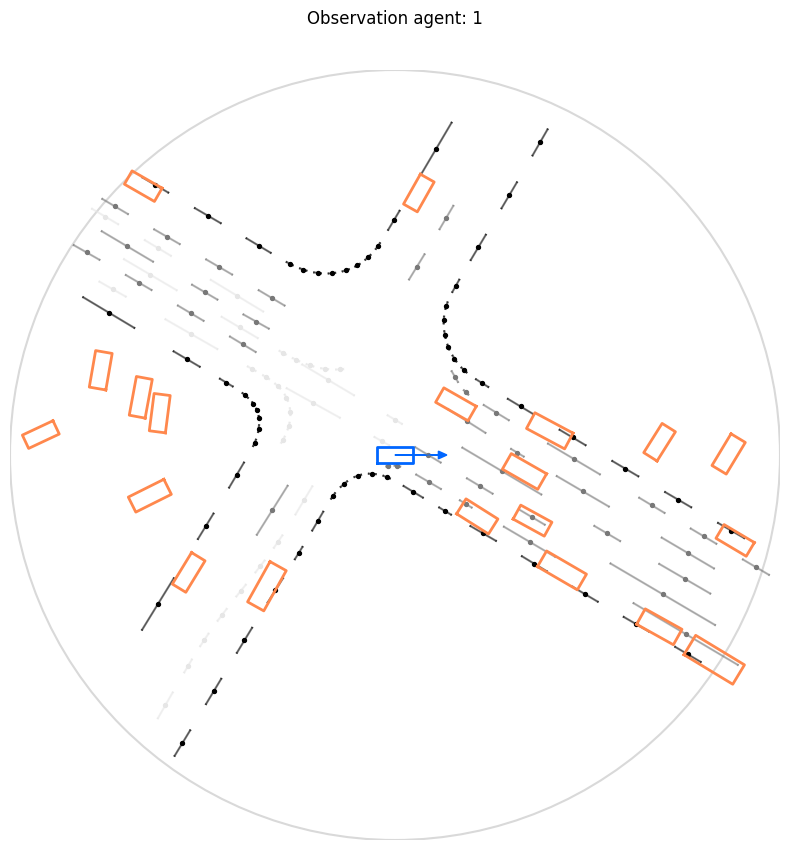

In [42]:
fig, ax = env.vis.plot_agent_observation(
    env_idx=1,
    agent_idx=1,
);

In [43]:
fig.savefig("agent_obs_0.pdf", format="pdf", bbox_inches="tight")

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def img_from_fig(fig: matplotlib.figure.Figure) -> np.ndarray:
  """Returns a [H, W, 3] uint8 np image from fig.canvas.tostring_rgb()."""
  # Just enough margin in the figure to display xticks and yticks.
  fig.subplots_adjust(
      left=0.08, bottom=0.08, right=0.98, top=0.9, wspace=0.05, hspace=0.05
  )
  fig.canvas.draw()
  data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  img = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  return img


In [62]:
mediapy.show_video([img_from_fig(fig)])

/tmp/ipykernel_751237/65554361.py:11: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)


In [53]:
# Reset environment
obs = env.reset()

expert_actions, _, _, _ = env.get_expert_actions()

frames = {f"env_{i}": [] for i in range(NUM_ENVS)}

# Step through the scene
for t in range(env_config.episode_len):

    env.step_dynamics(expert_actions[:, :, t, :])
    
    # Render the scenes
    for i in range(NUM_ENVS):
        frames[f"env_{i}"].append(env.render(i))

In [6]:
mediapy.show_videos(frames, fps=30, width=600, height=400, columns=1)

In [13]:
fig, ax = utils.init_fig_ax(viz_config)


NameError: name 'utils' is not defined